# 5xFAD Resting State Analysis

Analysis of resting state EEG data from 5xFAD mice model.

## Setup and Dependencies

In [1]:
using Pkg
Pkg.activate("../..")
Pkg.status()

  Activating project at `~/Documents/Kaizen/code/neuroelectrophysiology`


Status `~/Documents/Kaizen/code/neuroelectrophysiology/Project.toml`
⌃ [13f3f980] CairoMakie v0.13.10
  [717857b8] DSP v0.8.4
  [a93c6f00] DataFrames v1.7.0
  [7a1cc6ca] FFTW v1.9.0
  [f67ccb44] HDF5 v0.17.2
  [6a3955dd] ImageFiltering v0.7.12
  [0f8b85d8] JSON3 v1.14.3
⌃ [91a5bcdd] Plots v1.40.17
⌃ [7f904dfe] PlutoUI v0.7.68
⌃ [2913bbd2] StatsBase v0.34.5
  [69a5ce3b] UnfoldMakie v0.5.19
  [29a6e085] Wavelets v0.10.1
  [37e2e46d] LinearAlgebra v1.11.0
Info Packages marked with ⌃ have new versions available and may be upgradable.


### Load Sessions + Select

In [2]:
# List available session files
datapath = "5xFAD-resting-state-preprocessed"
files = readdir(datapath)
for (i, file) in enumerate(files)
    println("$i. $file")
end

1. 2023-08-25_14-20-15.h5
2. 2023-08-25_15-32-14.h5
3. 2023-08-25_16-48-03.h5
4. 2023-08-25_17-48-53.h5
5. 2023-08-25_18-47-30.h5
6. 2023-08-25_19-39-21.h5
7. 2023-08-25_20-33-11.h5
8. 2023-08-25_21-35-02.h5
9. 2023-08-25_22-02-17.h5
10. 2023-08-25_23-24-25.h5
11. 2023-08-26_00-12-57.h5
12. 2023-08-26_00-58-14.h5
13. 2023-08-26_01-43-12.h5
14. 2023-08-26_02-33-36.h5
15. 2023-09-06_15-06-20.h5
16. 2023-09-06_17-32-01.h5
17. 2023-09-06_19-26-36.h5


In [27]:
include("../../modules/neuroephys4julia/session.jl")
include("../../modules/neuroephys4julia/utilities.jl")

# Select which session to analyze (change this index)
selected_file_index = 1

if selected_file_index < 1 || selected_file_index > length(files)
    error("Invalid selection: choose between 1 and $(length(files))")
end

selected_file = files[selected_file_index]
session_path = joinpath(datapath, selected_file)

println("Loading session: $selected_file")
session = from_hdf5(session_path)

Loading session: 2023-08-25_14-20-15.h5


┌ Info: raw: Transposed (35323, 6) → (6, 35323) [channels, samples]
└ @ Main /Users/fomo/Documents/Kaizen/code/neuroelectrophysiology/modules/neuroephys4julia/session.jl:50
┌ Info: preprocessed: Transposed (35323, 5) → (5, 35323) [channels, samples]
└ @ Main /Users/fomo/Documents/Kaizen/code/neuroelectrophysiology/modules/neuroephys4julia/session.jl:50
┌ Info: data: Permuted (100, 5, 3523) → (5, 100, 3523) [channels, samples, epochs]
└ @ Main /Users/fomo/Documents/Kaizen/code/neuroelectrophysiology/modules/neuroephys4julia/session.jl:90
┌ Info: data: Permuted (100, 5, 3523) → (5, 100, 3523) [channels, samples, epochs]
└ @ Main /Users/fomo/Documents/Kaizen/code/neuroelectrophysiology/modules/neuroephys4julia/session.jl:90


Session('2023-08-25_14-20-15', 5 × 100 × 3523, epoched)

In [23]:

overview(session; overlap=0.9, show_pre=false)

=== SESSION OVERVIEW ===

Session ID: 2023-08-25_14-20-15
Sampling Rate: 100 Hz
Raw Shape: (6, 35323)
Preprocessed Shape: (5, 35323)
Epoch Shapes: (5, 100, 3523)
Good Channels: [1, 2, 3, 4, 5]
[raw] shape = (6, 35323)
  NaNs: 0 | Infs: 0
  Ch 1   mean=-0.0564  std= 60.2999  min=-354.8343  max= 290.3175  med=-3.3755
  Ch 2   mean=-0.0266  std= 62.3964  min=-517.3817  max= 337.4224  med=-2.0847
  Ch 3   mean=-0.0425  std= 62.5417  min=-493.0241  max= 392.7234  med=-2.8217
  Ch 4   mean=-0.0382  std= 50.2778  min=-343.3155  max= 312.8649  med=-1.9247
  Ch 5   mean=-0.0154  std= 51.3531  min=-313.7354  max= 391.1800  med=-2.0890
  Ch 6   mean= 0.6421  std= 0.0028  min= 0.3224  max= 0.7020  med= 0.6422

[epochs] shape = (5, 100, 3523)  (ch × samples/epoch × epochs)
  fs = 100.000 Hz  | overlap = 90.0%  | hop = 0.100 s  | span ≈ 353.20 s
  NaNs: 0 | Infs: 0
  Ch 1   mean=-0.1161  std= 60.4236  min=-354.7932  max= 290.2682  med=-3.3526  || per-epoch std: 54.5279 ± 25.2115
  Ch 2   mean= 0.151

## Analysis
### Raw EEG Visualization

In [25]:
include("../../modules/neuroephys4julia/analysis.jl")
include("../../modules/neuroephys4julia/plot.jl")

plot_bands

In [6]:
fig = plot_raw_eeg(session; 
    sample_start=2, 
    sample_end=10000, 
    name="Baseline", 
    standardize=true, 
    window_size=5,
    show = false
)


### Time-Frequency Plot

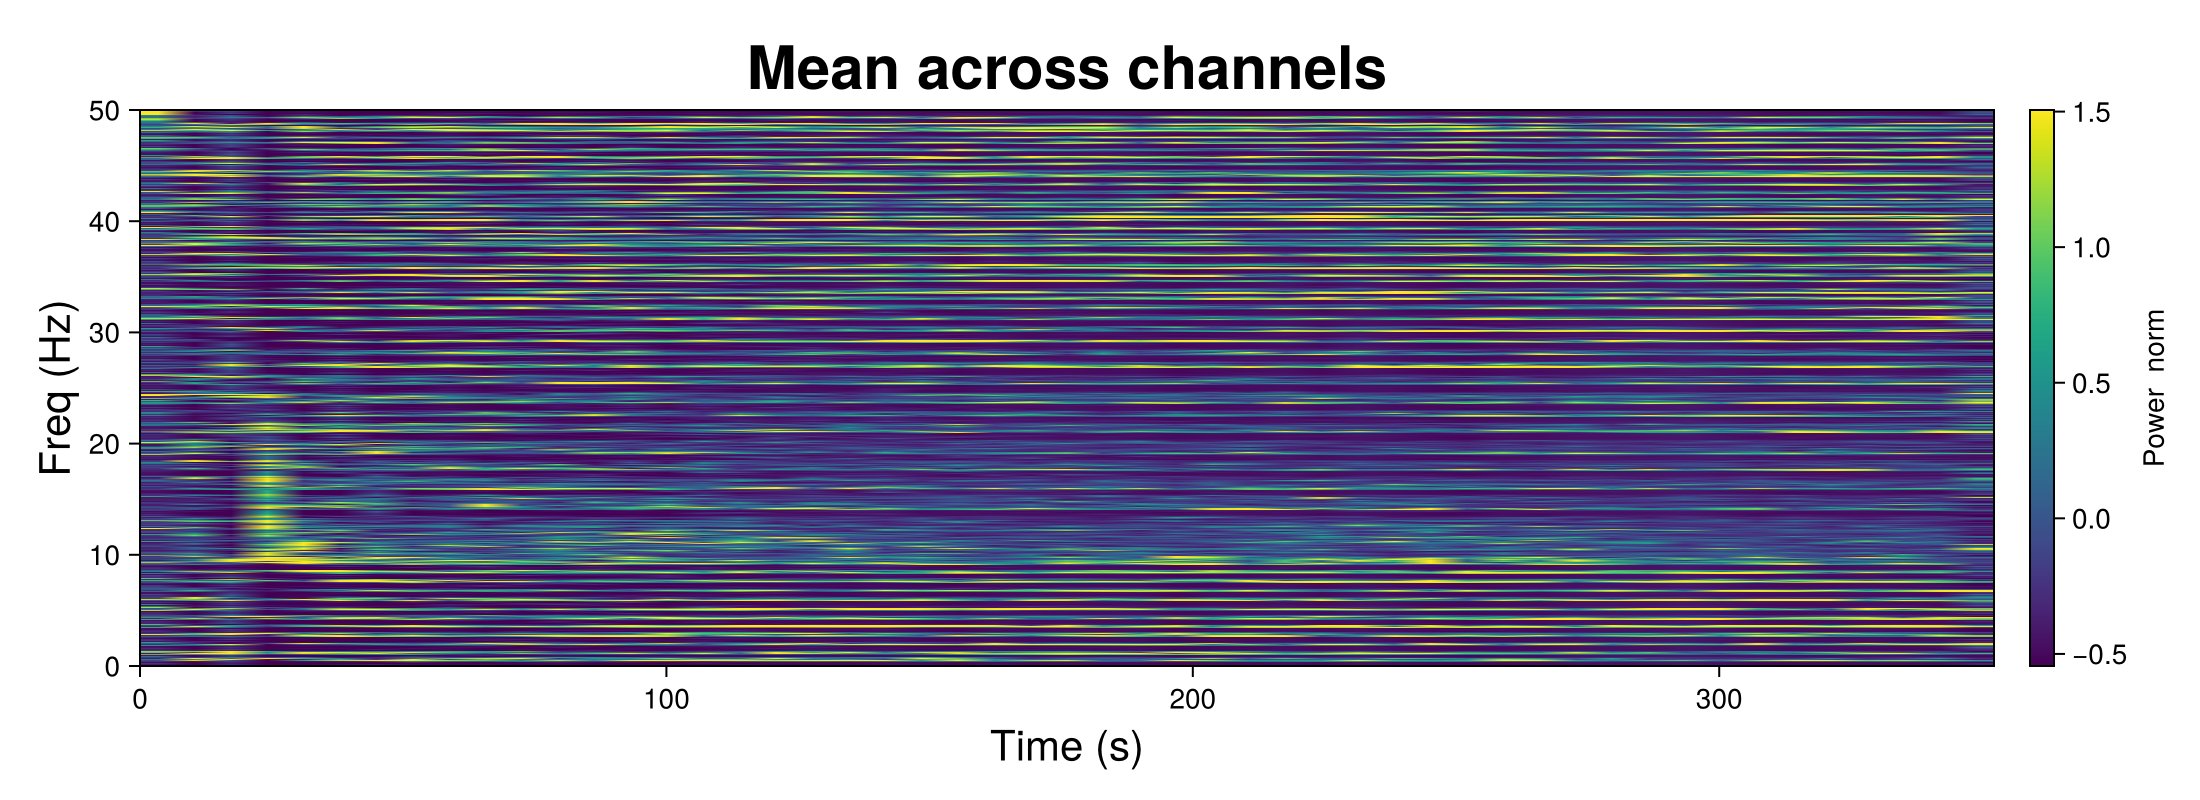

In [11]:
ts, freqs, power = myspectrogram(session)
fig = plot_spectrogram(ts, freqs, power;
    mode = :aggregate,
    normalize_per_freq=true,
    prange=(0.05, 0.95),
    interpolate=true,
    scale = :none,
    show = false
)
fig

### Bandpower Analysis

Implementation of multitaper spectral estimation and bandpower computation:

In [30]:
# Run the analysis pipeline
session_bands, bands = bandpower!(session)
session_scaled = logistic_scaler(session_bands)

# Inspect the results
println("Scaled session data: $(size(session_scaled.data)) - $(session_scaled.data_dimensions)")
println("Band names: $bands")

Scaled session data: (5, 5, 3523) - ["channels", "bands", "epochs"]
Band names: ["theta", "alpha", "gamma", "delta", "beta"]
Band names: ["theta", "alpha", "gamma", "delta", "beta"]


### Bandpower Visualization

Visualize the computed bandpower features:

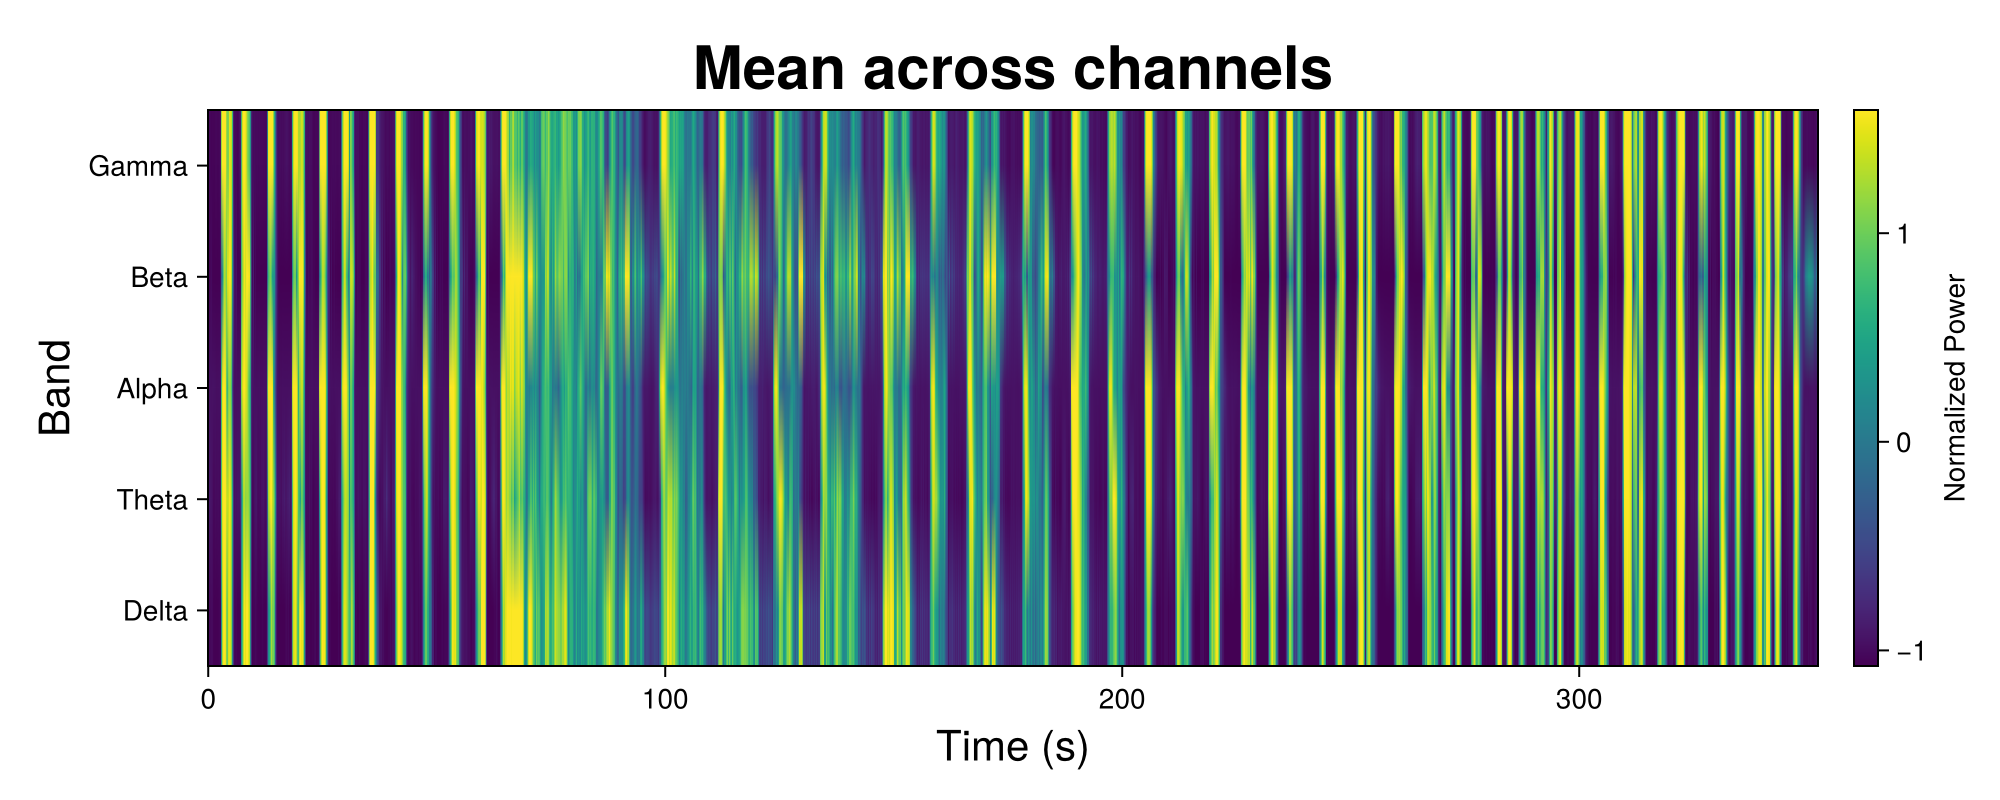

In [13]:
plot_bands(session_scaled;
    mode=:aggregate,
    interpolate = true,
    band_labels=["Delta","Theta","Alpha","Beta","Gamma"],
    normalize=:per_band,
    method=:zscore,
    overlap=0.9,
    show = false
)